1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.
2. (1 балл) Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.
3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.
4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.
5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.
6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.
6. (1 балл) Для задач регрессии: Постройте совместное распределение теоретических и эмпирических значений целевой переменной. Сделайте вывод о наличии либо отсутствии систематической компоненты в отклонениях, их общей величине.
7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.
7. (1 балл) Для задач регрессии: Постройте ту же модель, но с предварительной нормализацией значений признаков. Сделайте вывод о влиянии нормализации на качество работы модели.
8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.
9. (2 балл) Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели.
10. (2 балл) Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.


In [1]:
from sklearn.datasets import fetch_openml

data = fetch_openml(data_id=1472)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
data.DESCR

'**Author**: Angeliki Xifara, Athanasios Tsanas \n\n**Source**: UCI\n\n**Please cite**:   \n\nSource:\n  \nThe dataset was created by Angeliki Xifara (angxifara @ gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis @ gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).\n\nData Set Information:\n  \nWe perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.\n \nAttribute Information:\n \nThe dataset contains eight attributes (or features, de

In [3]:
data.target

0       7
1       7
2       7
3       7
4      12
       ..
763     9
764     8
765     7
766     7
767     8
Name: y1, Length: 768, dtype: category
Categories (37, object): ['1', '10', '11', '12', ..., '6', '7', '8', '9']

In [4]:
data.data

,V1,V2,V3,V4,V5,V6,V7,V8,y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,11
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,11
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,11
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,11
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,11
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,7
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,7
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,7


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

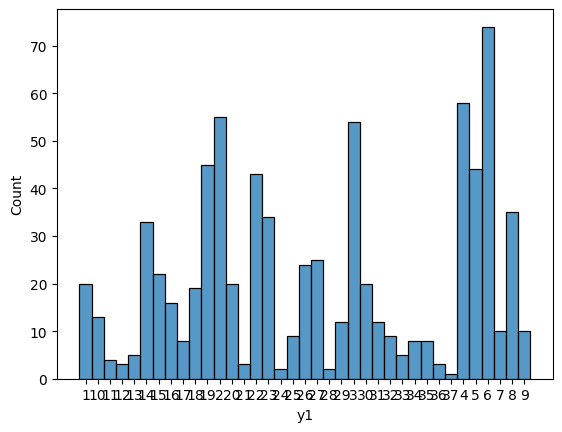

In [6]:
sns.histplot(data.target)
plt.show()

In [7]:
import pandas as pd
df = pd.DataFrame(data.data)

In [8]:
df


,V1,V2,V3,V4,V5,V6,V7,V8,y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,11
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,11
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,11
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,11
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,11
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,7
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,7
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,7


IndexError: index 8 is out of bounds for axis 0 with size 8

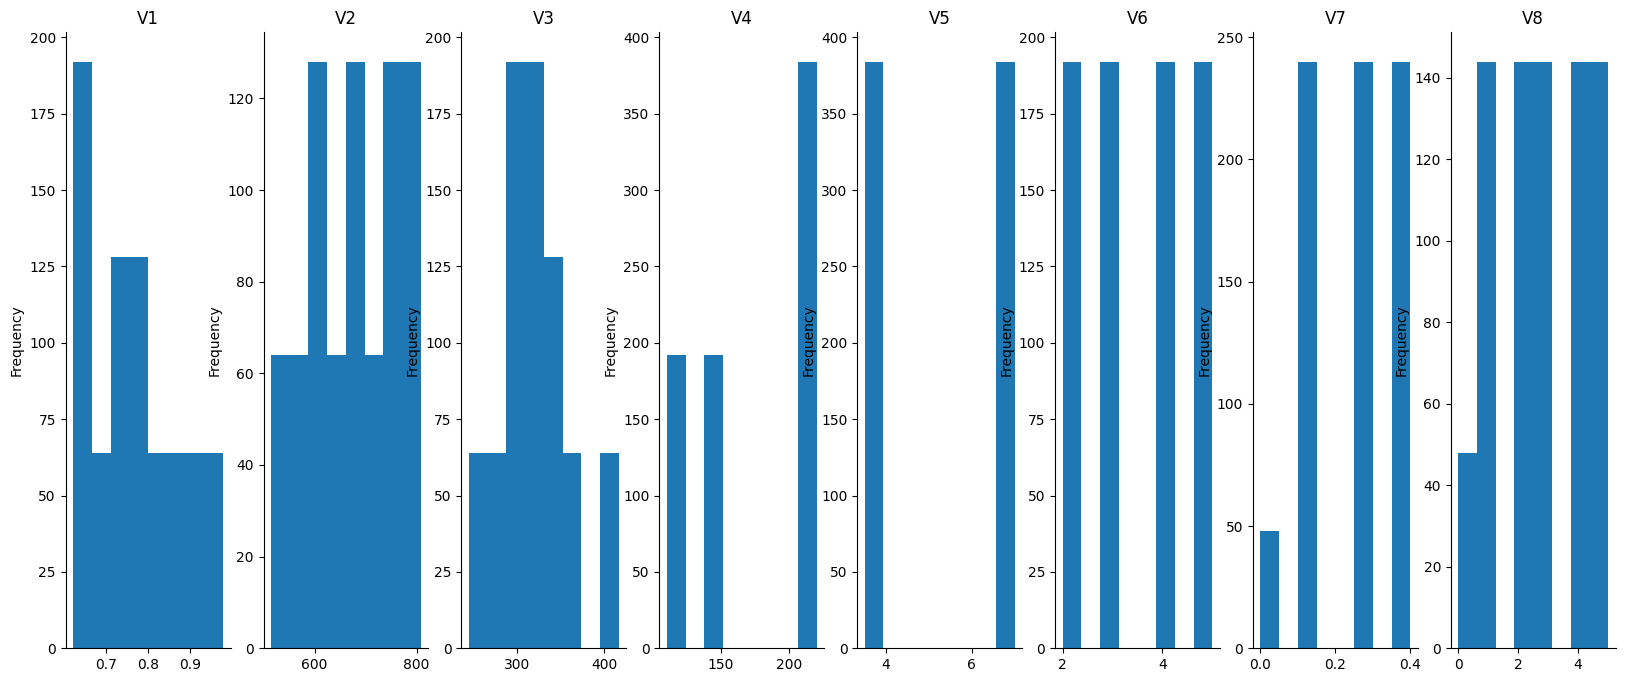

In [12]:
fig, axs = plt.subplots(1, 8, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    df[col].plot(kind='hist', bins=8, title=col, ax=axs[i])
    axs[i].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["y2"]), data.target, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.22      0.40      0.29         5
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         6
          19       0.14      0.27      0.19        11
           2       0.00      0.00      0.00        10
          20       0.00      0.00      0.00         4
          22       0.05      0.11      0.07         9
          23       0.18      0.60      0.27         5
          25       0.00      0.00      0.00         4
          26       0.40      0.33      0.36         6
          27       0.00      0.00      0.00         9
          29       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

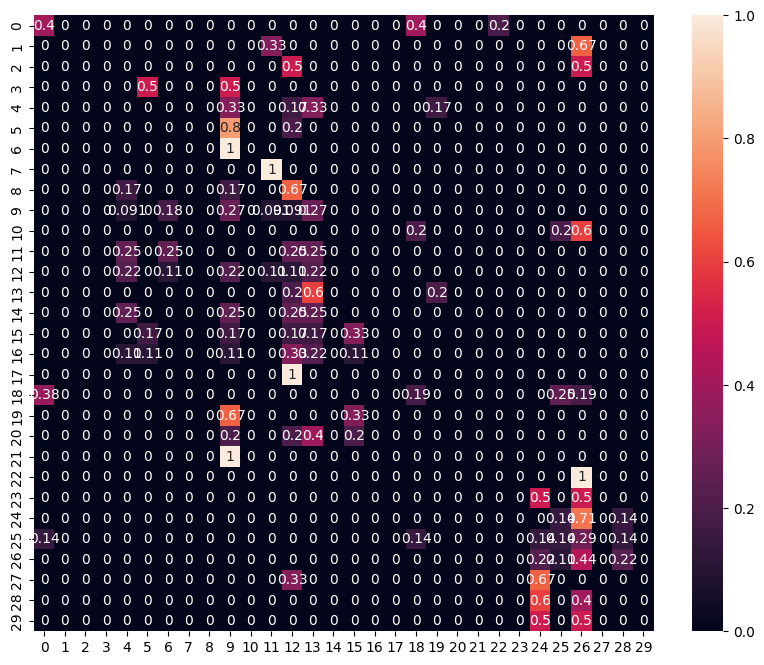

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
          10       0.25      0.33      0.29         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.67      0.67      0.67         6
          15       0.60      0.60      0.60         5
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       0.67      0.67      0.67         6
          19       0.55      0.55      0.55        11
           2       0.91      1.00      0.95        10
          20       0.25      0.25      0.25         4
          21       0.00      0.00      0.00         0
          22       0.75      0.33      0.46         9
          23       0.44      0.80      0.57         5
          24       0.00      0.00      0.00         0
          25       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [32]:
set(data.target.values)

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

<Axes: >

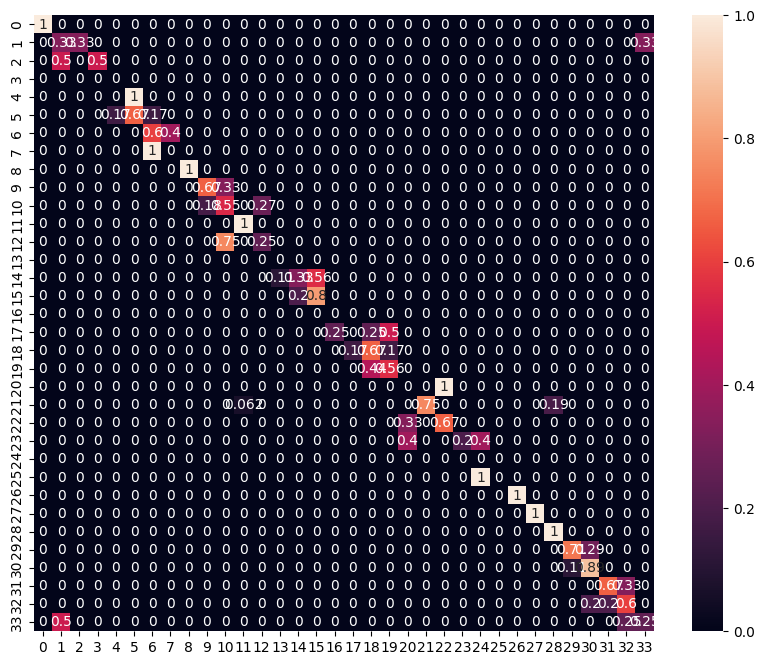

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
          10       0.33      0.67      0.44         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.50      1.00      0.67         2
          14       0.27      0.50      0.35         6
          15       0.00      0.00      0.00         5
          16       0.07      1.00      0.13         1
          17       0.00      0.00      0.00         1
          18       0.43      0.50      0.46         6
          19       0.00      0.00      0.00        11
           2       0.77      1.00      0.87        10
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         9
          23       0.67      0.40      0.50         5
          24       0.00      0.00      0.00         0
          25       0.25    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

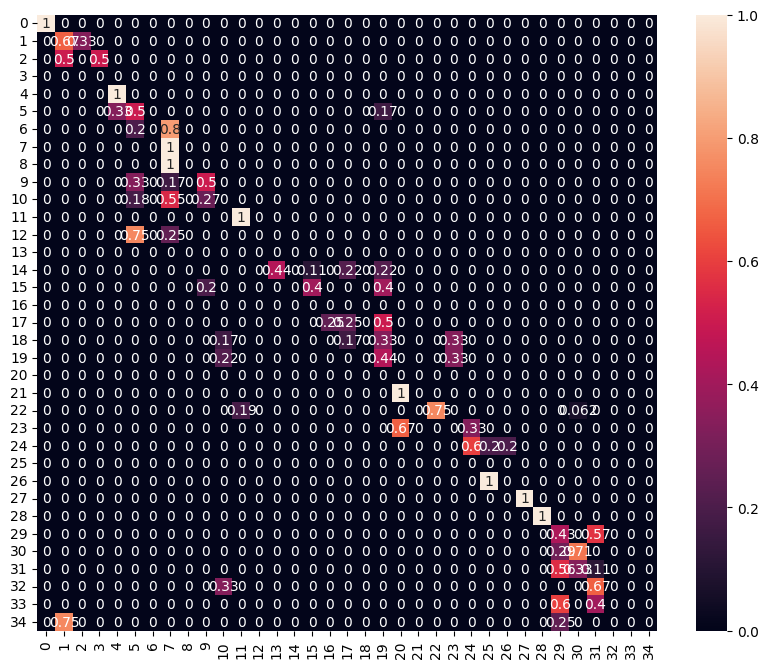

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [37]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


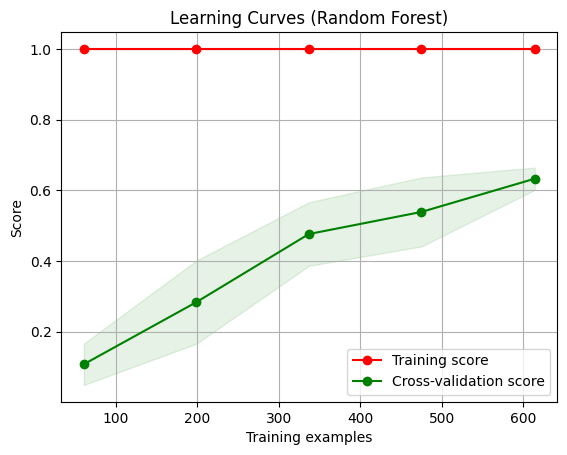

(0.6328240387063917, 0.03474604920087977)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np
from catboost import CatBoostClassifier

rf_clf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_clf, data.data, data.target, cv=5)

train_sizes, train_scores, test_scores = learning_curve(rf_clf, data.data, data.target, train_sizes=np.linspace(.1, 1.0, 5), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

cv_scores.mean(), cv_scores.std()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

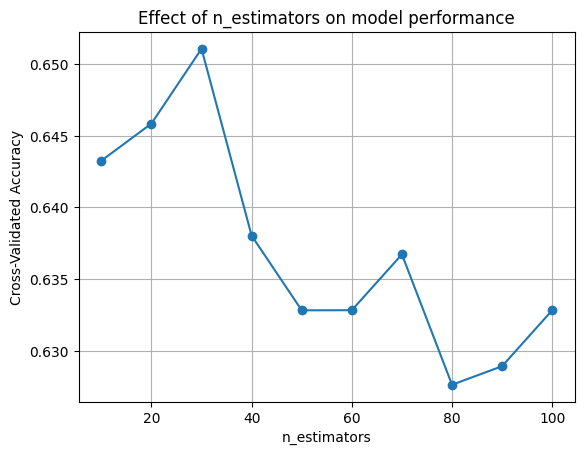

[0.6432560903149138,
 0.6458450046685341,
 0.6510652745946863,
 0.6380273321449793,
 0.6328155504626094,
 0.6328240387063917,
 0.6367201426024957,
 0.6276207452678041,
 0.6289194465665054,
 0.6328240387063917]

In [39]:

n_estimators_range = range(10, 101, 10)
mean_scores = []

for n_estimators in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_clf, data.data, data.target, cv=5)
    mean_scores.append(scores.mean())

plt.figure()
plt.plot(n_estimators_range, mean_scores, marker='o')
plt.title('Effect of n_estimators on model performance')
plt.xlabel('n_estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

mean_scores
